# **Task P3** 
## Plotting the Avocado Data using Pandas and Seaborn

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">


### A. Instructions

1. Complete this task without looking at the solution notebook. 
2. You can then look at the solution notebook and compare it against yours.
3. Complete and submit the TaskCompletionReport form in PDF format using Ontrack. You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM of the due date.
4. Do **not** include the solution (yours or the one provided to you) in your submission.
5. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
6. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

In [5]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### B. Write Python code that performs (answers) the following operations (questions) 

##### 1. Read the data from the .csv file into a DataFrame and display the first five rows.

In [7]:
# write your code here
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 2. Create a new DataFrame that contains the total of the Small Bags, Large Bags, and XLarge Bags columns grouped by type, and then display the DataFrame.

In [21]:
# write your code here

# Group the data by 'type' and calculate the total number of small, large, and extra large bags
dataGrouped = data.groupby('type').sum()[['Small Bags','Large Bags','XLarge Bags']]
# Display the grouped data
dataGrouped

,Small Bags,Large Bags,XLarge Bags
type,,,
conventional,3.164183e+09,9.259030e+08,56678255.60
organic,1.606877e+08,6.571281e+07,10921.73


##### 3.	Use the grouped data to create a bar plot that shows the number of small, large, and extra-large bags for both types of avocado.

<Axes: xlabel='type'>

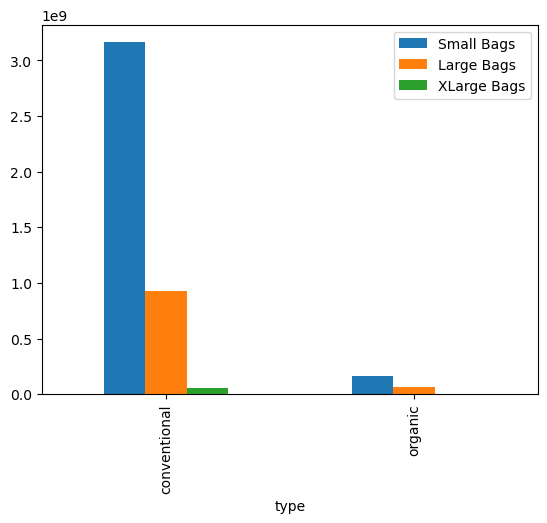

In [23]:
# write your code here

# Create a bar plot based on the data in dataGrouped
dataGrouped.plot.bar()

##### 4.	Use the original data to create a scatter plot for the Total Volume and AveragePrice columns.

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

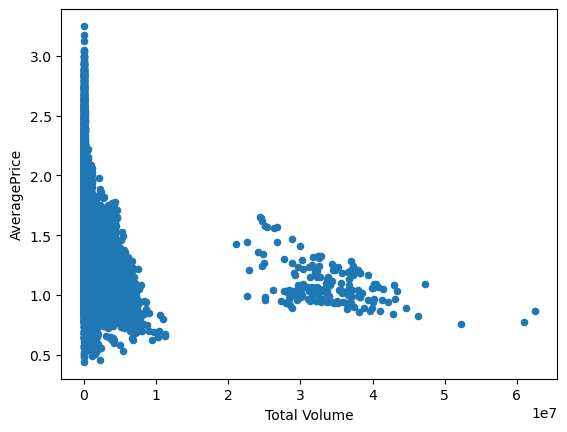

In [25]:
# write your code here

# create a scatter plot with 'Total Volume' on the x-axis and 'AveragePrice' on the y-axis
data.plot.scatter(x= 'Total Volume', y = 'AveragePrice')

<Axes: xlabel='AveragePrice', ylabel='Total Volume'>

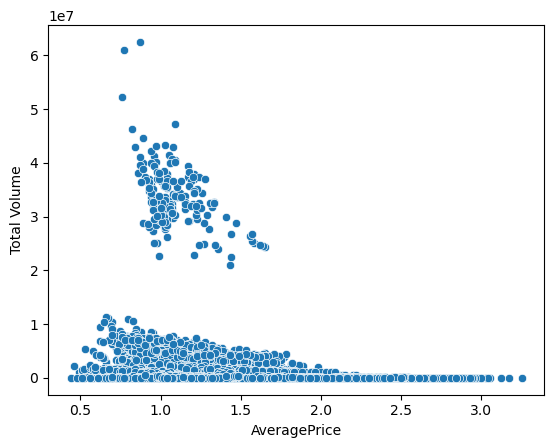

In [42]:
##### 5.	Create the following plot with a Seaborn specific method.
import seaborn as sns

sns.scatterplot(data=data, x='AveragePrice', y='Total Volume')



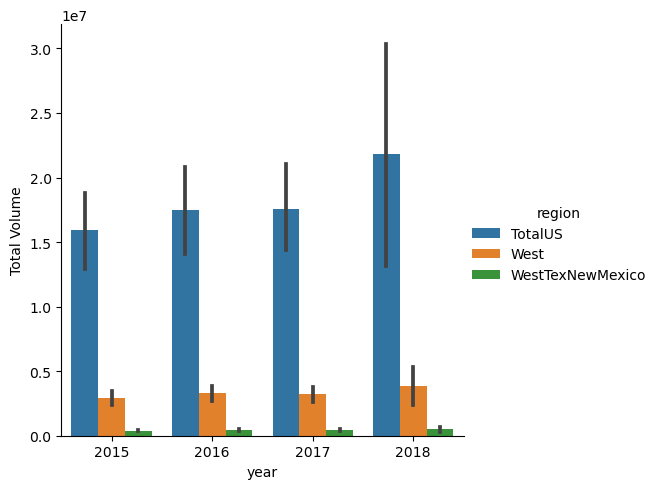

In [55]:
# write your code here

# plot a scatter plot using seaborn's scatterplot function
# set the 'data' parameter to 'data' DataFrame, 'x' parameter to 'AveragePrice' column, and 'y' parameter to 'Total Volume' column
sns.catplot(data=data.query('region in ("West","TotalUS","WestTexNewMexico")'), 
            x='year',
            kind = "bar",
            y='Total Volume',
           hue = 'region')

##### 6.	Create a plot that looks like the one that follows.
<img src="p3-6.png" alt=" plot with a Seaborn specific method" width ="470">

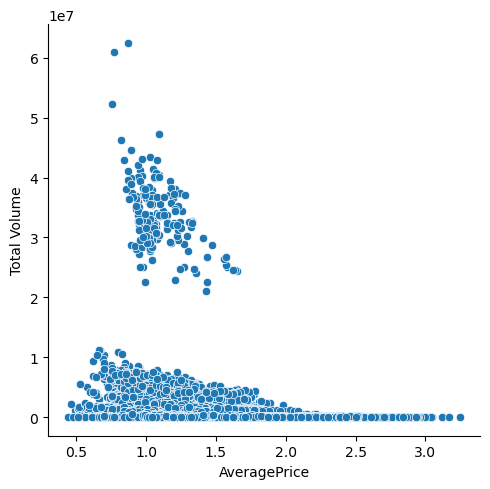

In [71]:
# write your code here

# create a categorical plot with the specified conditions
sns.relplot(data = data, kind = 'scatter', x= 'AveragePrice', y= 'Total Volume')

##### 7.	Rewrite the following line of code to create the same plot with a generic method: sns.scatterplot(data=data, x='AveragePrice', y='Total Volume')

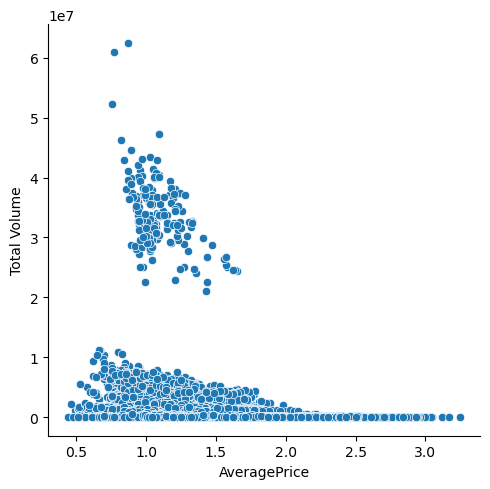

In [74]:
# write your code here

# Create a scatter plot using seaborn's relplot
# with data from the 'data' dataframe, and set the x-axis to 'AveragePrice'
# and y-axis to 'Total Volume'
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume')

##### 8.	Create the same plot as in the previous section but with the hue parameter set to year and the dots for the total volume ranging in size from 10 to 100.

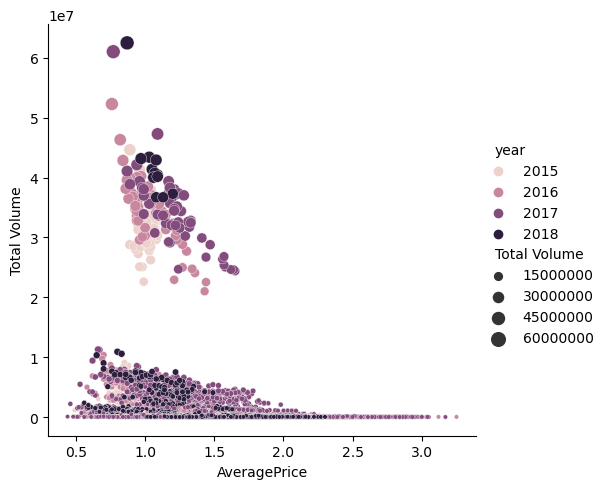

In [85]:
# write your code here

# Create a scatterplot using relplot. Data parameter specifies the data to be plotted, and kind='scatter' 
# specifies that a scatter plot should be created. The x and y parameters specify the variables to be 
# plotted on the x and y axes, respectively. The hue parameter specifies that the plot should be colored based 
# on the year column of the data. The size parameter specifies the size of each point on the plot based on the 
# Total Volume column of the data, and sizes=(10,100) specifies the minimum and maximum sizes of the points.
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume', hue = 'year', size = 'Total Volume',sizes = (10,100))

##### 9.	In what year were the most bags of avocados sold? use plots to answer this question.

<Axes: xlabel='year'>

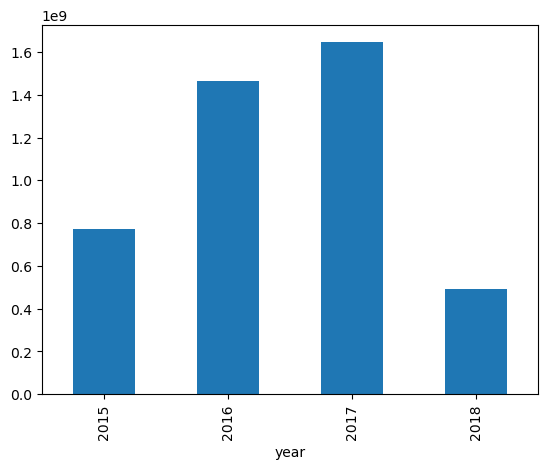

In [87]:
# write your code here

# Group the data by year and sum the 'Total Bags' column for each year
total_bags_by_years = data.groupby('year')['Total Bags'].sum()
# Create a bar plot of the data
total_bags_by_years.plot.bar()

##### 10.	Do the total bags of avocados appear to have an effect on the average price? use plots to answer this question.

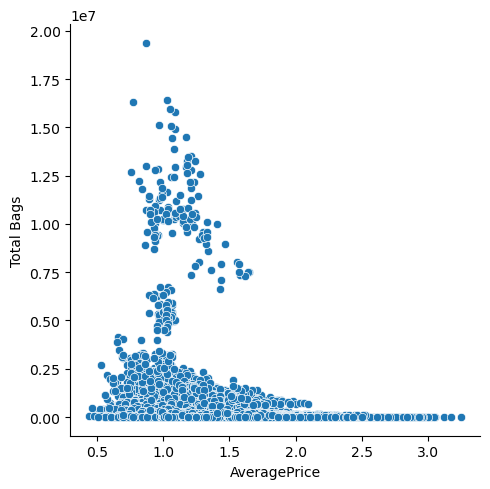

In [92]:
# write your code here
sns.relplot(data = data,kind = 'scatter', y= 'Total Bags', x="AveragePrice")

### C. Learn more

* https://www.youtube.com/watch?v=jb_MvVFZXeU
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/gallery/index.html
* https://plotly.com/python/
* https://www.kaggle.com/code/kanncaa1/plotly-tutorial-for-beginners